In [17]:
# !pip install tensorflow
# print('xong')

In [2]:
print("thanh")

thanh


In [3]:
import tensorflow as tf
print('ss')

ss


In [4]:
# Install TensorFlow
import tensorflow as tf
# Load and prepare the MNIST dataset
data = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()
m_train = x_train.shape[0]
print(x_train.shape)

(60000, 28, 28)


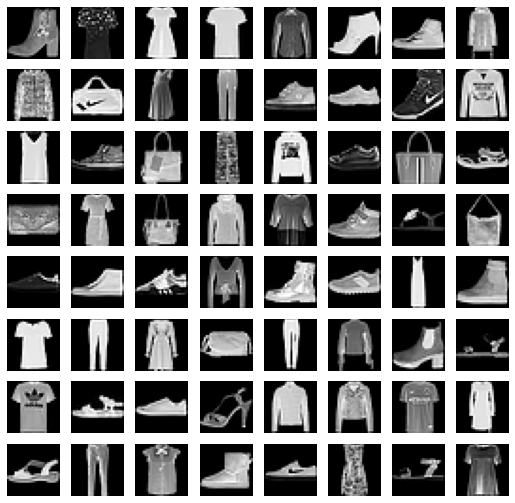

In [5]:
# dùng vẽ đồ thị, hình ảnh
import matplotlib.pyplot as plt 
import numpy as np
# Kiểm tra ngẫu nhiên 9 mẫu training trong tổng số 60.000 mẫu
# Tạo số ngẫu nhiên nhưng không thay đổi khi ru  nhiều lần
np.random.seed(100) 
# Tạo dang sách 9 phần tử ngẫu nhiên từ m_train có 60.000 phần tử
m_train = x_train.shape[0]
indices = list(np.random.randint(m_train, size=64))
fig = plt.figure(figsize=(9,9))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = x_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    
    #plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

# Tensorflow

## Tiền xử lý data và chuẩn hoá

In [6]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
data = genfromtxt('data/advertising.csv', delimiter =',', skip_header = 1)
m = data.shape[0]
X = data[:,:3]
Y = data[:,3]
maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X - avg)/(maxi - mini)


In [7]:
## Chuẩn bị huấn luyện

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape = [3])
])
model.compile(optimizer = tf.keras.optimizers.SGD(0.05),
loss = tf.keras.losses.MeanAbsoluteError())

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Train

<class 'dict'>
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[16.394236 ],
       [ 7.3288054],
       [ 2.8900785]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([12.109352], dtype=float32)>]


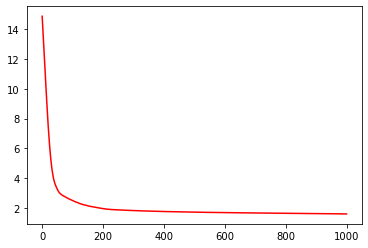

In [9]:
history = model.fit(X,Y, epochs = 1000, verbose = 0)
print(type(history.history))
print(model.layers[0].weights)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'r')
plt.show()

## Bài toán bộ dữ liệu giá nhà Boston có 13 đặc trưng, 506 mẫu dữ liệu

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

boston_housing = keras.datasets.boston_housing
(train_data, train_labels),(test_data,test_labels) = boston_housing.load_data()

# Xáo trộn tập huấn luyện
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]
#Training set: (404, 13)
print("Training set: {}".format(train_data.shape))
#Testing set:  (102, 13)
print("Testing set:  {}".format(test_data.shape)) 

# Tính Mean và độ lệch chuẩn std (sigma)
mean = train_data.mean(axis = 0) # theo dạng cột
std = train_data.std(axis = 0)

# CHuẩn hoá dữ liệu
train_data = (train_data - mean )/std
test_data = (test_data - mean)/std
print(train_data[:4])

Training set: (404, 13)
Testing set:  (102, 13)
[[-0.39835245 -0.48361547 -1.20749443 -0.25683275 -0.95909523  1.62068604
  -0.2333057  -0.12086144 -0.85646254 -0.78172765 -0.21658981  0.44807713
  -0.90411453]
 [ 0.35813255 -0.48361547  1.0283258  -0.25683275  0.48352625 -0.23145674
   0.57655414 -0.84749735  1.67588577  1.5652875   0.78447637 -3.74769575
   1.45595122]
 [-0.27496052 -0.48361547  1.24588095 -0.25683275  0.40670026 -0.55307788
   0.91698195 -0.64820756 -0.51114231 -0.01744323 -1.71818909 -0.66485912
   0.23313353]
 [-0.38762573 -0.48361547 -0.54747912 -0.25683275 -0.54935658  0.2241732
  -0.59881766  0.39459931 -0.51114231 -0.71552978  0.51145832  0.44807713
  -0.76471883]]


In [11]:
aa = np.argsort(np.random.random(10,)).reshape(5,2) +np.array([0.23,0.34])
print(aa)
mean_aa = aa.mean(axis = 0) 
std_aa = aa.std(axis = 0)
print('std: ',std_aa)
print('mean: ',mean_aa)
chuanHoa = (aa - mean_aa)/std_aa
print(chuanHoa)

[[1.23 2.34]
 [3.23 6.34]
 [5.23 7.34]
 [0.23 4.34]
 [9.23 8.34]]
std:  [3.2        2.15406592]
mean:  [3.83 5.74]
[[-0.8125     -1.57841037]
 [-0.1875      0.27854301]
 [ 0.4375      0.74278135]
 [-1.125      -0.64993368]
 [ 1.6875      1.2070197 ]]


In [12]:
print(train_data.shape[1])

13


In [13]:
model = keras.Sequential([
    keras.layers.Dense(64, activation = tf.nn.relu, input_shape = (train_data.shape[1],)),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense(1)
])

loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.RMSprop()
metric = tf.keras.losses.MeanAbsoluteError() # Xác định độ chính xác của mô hình

model.compile(loss = loss, optimizer = optimizer, metrics = [metric])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
11/11 [==============================] - 1s 93ms/step - loss: 544.7696 - mean_absolute_error: 21.4524 - val_loss: 457.9278 - val_mean_absolute_error: 19.5024
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 433.8518 - mean_absolute_error: 19.0121 - val_loss: 378.8506 - val_mean_absolute_error: 17.4254
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 398.6926 - mean_absolute_error: 17.8801 - val_loss: 299.1675 - val_mean_absolute_error: 15.1825
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 302.7961 - mean_absolute_error: 15.1854 - val_loss: 218.4711 - val_mean_absolute_error: 12.5788
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 199.9679 - mean_absolute_error: 12.1277 - val_loss: 150.8310 - val_mean_absolute_error: 10.0118
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 129.6788 - mean_absolute_error: 9.3596 - val_loss: 104.4235 - val_mean_absolute_e

Epoch 100/100
11/11 [==============================] - 0s 4ms/step - loss: 6.0046 - mean_absolute_error: 1.8137 - val_loss: 15.9149 - val_mean_absolute_error: 3.0812


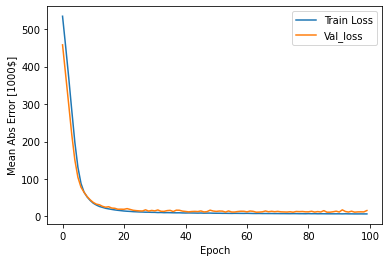

In [14]:
history = model.fit(train_data, train_labels, epochs = 100, 
                   validation_split = 0.2, verbose = 1) # validation = 0.2 tức là chia tập dữ liệu làm 2 phần train và validation (20%)

import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [1000$]')
plt.plot(history.epoch, np.array(history.history['loss']), label = 'Train Loss')
plt.plot(history.epoch, np.array(history.history['val_loss']), label = 'Val_loss')
plt.legend()
plt.show()

In [16]:
test_predictions = model.predict(test_data)
print(test_predictions.shape)

(102, 1)
